# Preprocesamiento

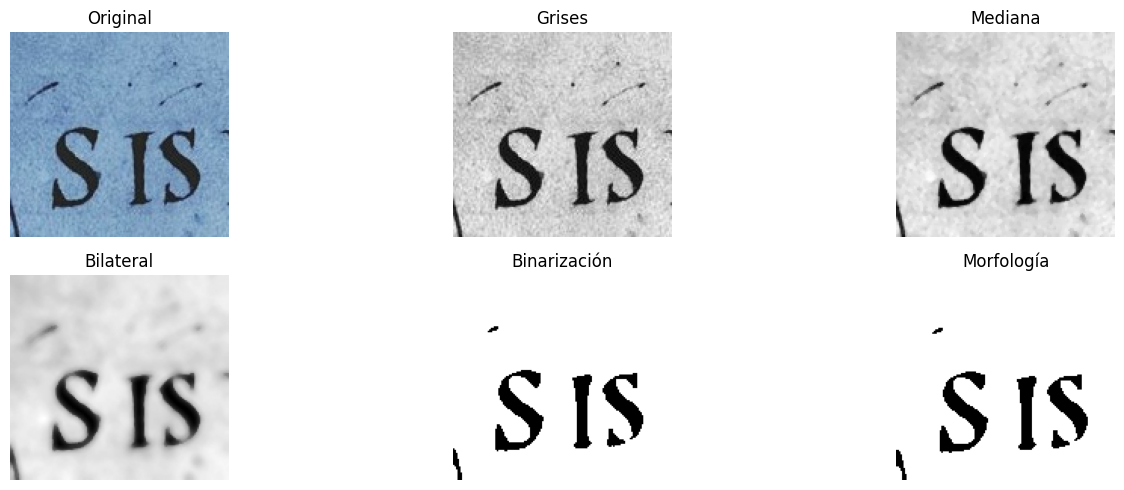

True

In [15]:
import cv2
import matplotlib.pyplot as plt

# 1. Leer imagen
img = cv2.imread('Manuscritos.jpg')

# 2. Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Filtro de mediana (reduce ruido sal/pimienta)
median = cv2.medianBlur(gray, 3)

# 4. Filtro bilateral (suaviza pero preserva bordes)
bilateral = cv2.bilateralFilter(median, d=9, sigmaColor=75, sigmaSpace=75)

# 5. Binarización (Otsu)
_, thresh = cv2.threshold(bilateral, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 6. Operaciones morfológicas para limpiar el texto
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Mostrar resultados
titles = ['Original', 'Grises', 'Mediana', 'Bilateral', 'Binarización', 'Morfología']
images = [img, gray, median, bilateral, thresh, morph]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# --- Guardar resultados ---
cv2.imwrite("resultados/1_grises.jpg", gray)
cv2.imwrite("resultados/2_mediana.jpg", median)
cv2.imwrite("resultados/3_bilateral.jpg", bilateral)
cv2.imwrite("resultados/4_binarizada_otsu.jpg", thresh)
cv2.imwrite("resultados/5_morfologia.jpg", morph)

